# Brain connectivity & Motor Performances

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pylab as plt

def plot_matrices(matrices, matrix_kind):
    n_matrices = len(matrices)
    plt.figure(figsize=(n_matrices * 4, 4))
    for n_subject, matrix in enumerate(matrices):
        plt.subplot(1, n_matrices, n_subject + 1)
        matrix = matrix.copy()  # avoid side effects
        # Set diagonal to zero, for better visualization
        np.fill_diagonal(matrix, 0)
        vmax = np.max(np.abs(matrix))
        plt.imshow(matrix, vmin=-vmax, vmax=vmax, cmap='RdBu_r',
                   interpolation='nearest')
        plt.title('{0}, subject {1}'.format(matrix_kind, n_subject))

In [2]:
from nilearn.input_data import NiftiLabelsMasker
from nilearn.datasets import load_mni152_brain_mask
from nilearn import datasets
import nibabel as nib
import nibabel as nib 
from nilearn.plotting import find_xyz_cut_coords
from nilearn.image import math_img
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from sklearn.externals.joblib import Memory
from nilearn import plotting
# Prepare ploting
basc = datasets.fetch_atlas_basc_multiscale_2015(version='asym')['scale444']
brainmask = load_mni152_brain_mask()
masker = NiftiLabelsMasker(labels_img = basc, mask_img = brainmask, 
                           memory_level=1, verbose=0,
                           detrend=True, standardize=False,  
                           high_pass=0.01,t_r=2.28,
                           resampling_target='labels'
                           )
masker.fit()

nib_basc444 = nib.load(basc)
labels_data = nib_basc444.get_data()  
    #fetch all possible label values 
all_labels = np.unique(labels_data)
    # remove the 0. value which correspond to voxels out of ROIs
all_labels = all_labels[1:]
#    bari_labels = np.zeros((all_labels.shape[0],3))
#    ## go through all labels 
#    for i,curlabel in enumerate(all_labels):
#        vox_in_label = np.stack(np.argwhere(labels_data == curlabel))
#        bari_labels[i] = vox_in_label.mean(axis=0)
#        
allcoords=[]
for i,curlabel in enumerate(all_labels):
    img_curlab = math_img(formula="img==%d"%curlabel,img=basc)
    allcoords.append(find_xyz_cut_coords(img_curlab))
allcoords=np.array(allcoords)

C:\Users\mmenoret\Miniconda2\envs\fmri_3\lib\site-packages\scipy\ndimage\interpolation.py:462: UserWarning: The behaviour of affine_transform with a one-dimensional array supplied for the matrix parameter has changed in scipy 0.18.0.
  "The behaviour of affine_transform with a one-dimensional "


C:\Users\mmenoret\Miniconda2\envs\fmri_3\lib\site-packages\nilearn\image\resampling.py:481: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\Users\mmenoret\Miniconda2\envs\fmri_3\lib\site-packages\scipy\ndimage\interpolation.py:462: UserWarning: The behaviour of affine_transform with a one-dimensional array supplied for the matrix parameter has changed in scipy 0.18.0.
  "The behaviour of affine_transform with a one-dimensional "


25


C:\Users\mmenoret\Miniconda2\envs\fmri_3\lib\site-packages\numpy\ma\core.py:2766: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


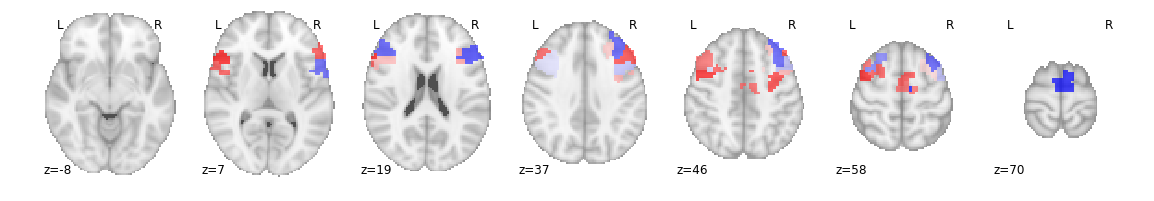

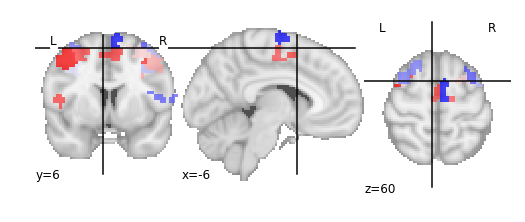

In [11]:
from nilearn.image import resample_to_img
mask='F:/IRM_Marche/imag_mask_harv.nii'
mask_sh=resample_to_img(mask,basc)
mask_sh=math_img('img>0.2',img=mask_sh)
#plotting.plot_roi(mask_sh)
m_intersept=math_img('img1*img2',img1=basc,img2=mask_sh)
#plotting.plot_roi(m_intersept,cmap=plotting.cm.bwr_r,display_mode='z')
#plotting.plot_roi(m_intersept,cmap=plotting.cm.bwr_r,cut_coords=[-6, 6, 60])

basc_motor = m_intersept.get_data()  
    #fetch all possible label values 
labels_motor = np.unique(basc_motor)
    # remove the 0. value which correspond to voxels out of ROIs
labels_motor = labels_motor[1:]
labels_motor_final=[]
for i in labels_motor:
    if ((basc_motor==i)!=(labels_data==i)).sum()<60:
        labels_motor_final.append(i)

labels_motor_final=np.array(labels_motor_final,dtype=int)
print(len(labels_motor_final))

from nilearn.image import new_img_like
new_label=np.copy(labels_data)
for k in range(445):
    if k not in labels_motor_final:
#        new_label[labels_data==k]=0
        np.putmask(new_label,new_label==k,0)
basc_motor_img=new_img_like(basc,new_label)
plotting.plot_roi(basc_motor_img,cmap=plotting.cm.bwr_r, display_mode='z',cut_coords=[-8,7,19,37,46,58,70])
plotting.plot_roi(basc_motor_img,cmap=plotting.cm.bwr_r, cut_coords=[-6, 6, 60])
#plotting.plot_roi(basc_motor_img,cmap=plotting.cm.bwr_r, display_mode='y')

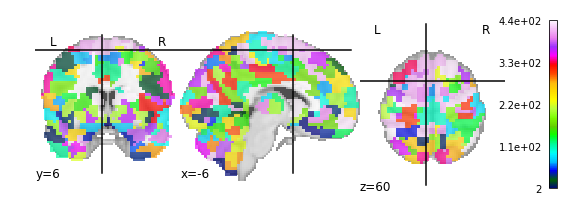

In [33]:
from nilearn import plotting, image

plotting.plot_roi(basc,cut_coords=[-6, 6, 60],colorbar=True)

C:\Users\mmenoret\Miniconda2\envs\fmri_3\lib\site-packages\numpy\ma\core.py:2766: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


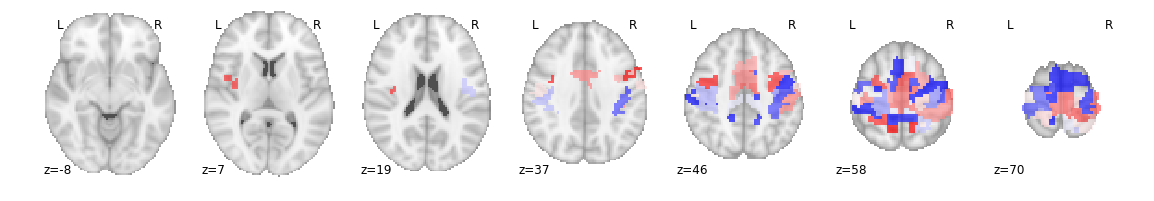

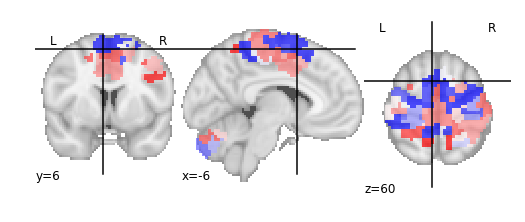

In [93]:
mask='D:\spm12\toolbox\Anatomy\PMaps\

In [12]:
print(labels_motor_final.shape)
labels_motor_final.tofile('F:/IRM_Marche/harv_imag_basc444asym.np')

(25,)


C:\Users\mmenoret\Miniconda2\envs\fmri_3\lib\site-packages\numpy\ma\core.py:2766: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


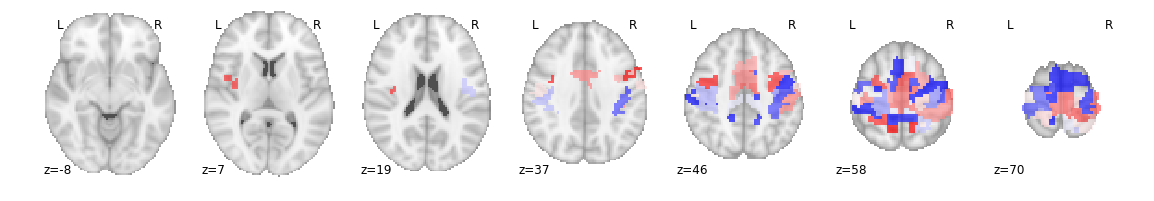

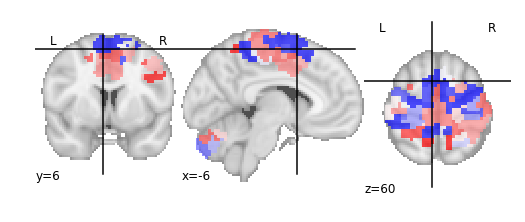

In [93]:
labels_motor_final=np.hstack((labels_motor_final,424))
from nilearn.image import new_img_like
new_label=np.copy(labels_data)
for k in range(445):
    if k not in labels_motor_final:
#        new_label[labels_data==k]=0
        np.putmask(new_label,new_label==k,0)
basc_motor_img=new_img_like(basc,new_label)
plotting.plot_roi(basc_motor_img,cmap=plotting.cm.bwr_r, display_mode='z',cut_coords=[-8,7,19,37,46,58,70])
plotting.plot_roi(basc_motor_img,cmap=plotting.cm.bwr_r, cut_coords=[-6, 6, 60])

In [64]:
print(labels_motor_final)

[ 10  11  18  20  32  35  47  53  57  61  67  68  80  82  84  86  89  91
  97 104 108 110 111 121 122 123 124 126 127 133 135 136 137 142 147 150
 156 157 165 167 181 186 189 191 195 201 206 214 230 237 239 257 259 268
 272 277 287 292 294 305 306 310 316 351 355 365 369 372 387 395 397 401
 409 418 421 424 425 427 428 432 435]


In [187]:
import os
fold='F:/IRM_Marche/mni4060/'
listfold=os.listdir(fold)
suj_data=[]
for i in listfold:
    if 'asymroirest_ss' in i:
        sujdir=fold+i
        suj_data.append(np.load(sujdir)['roi'])
        print(sujdir)
suj_sex=np.array((1,2,1,2,1,2,2,1,2,2,2,2,2,1,2,1,2,1,2,2,2,1))
suj_age=np.array((51,52,60,43,53,57,42,43,54,59,50,56,46,44,48,58,54,49,57,41,59,45))
suj_md=np.array((63,77,56,77,67,55,73,66,64,69,68,64,61,64,68,60,70,59,65,52,59,53))


#suj_label=

F:/IRM_Marche/mni4060/asymroirest_ss_ap.npz
F:/IRM_Marche/mni4060/asymroirest_ss_as.npz
F:/IRM_Marche/mni4060/asymroirest_ss_bh.npz
F:/IRM_Marche/mni4060/asymroirest_ss_bi.npz
F:/IRM_Marche/mni4060/asymroirest_ss_cas.npz
F:/IRM_Marche/mni4060/asymroirest_ss_cb.npz
F:/IRM_Marche/mni4060/asymroirest_ss_cmp.npz
F:/IRM_Marche/mni4060/asymroirest_ss_cs.npz
F:/IRM_Marche/mni4060/asymroirest_ss_gbn.npz
F:/IRM_Marche/mni4060/asymroirest_ss_gm.npz
F:/IRM_Marche/mni4060/asymroirest_ss_gn.npz
F:/IRM_Marche/mni4060/asymroirest_ss_ms.npz
F:/IRM_Marche/mni4060/asymroirest_ss_mv.npz
F:/IRM_Marche/mni4060/asymroirest_ss_pa.npz
F:/IRM_Marche/mni4060/asymroirest_ss_pc.npz
F:/IRM_Marche/mni4060/asymroirest_ss_ph.npz
F:/IRM_Marche/mni4060/asymroirest_ss_pm.npz
F:/IRM_Marche/mni4060/asymroirest_ss_pom.npz
F:/IRM_Marche/mni4060/asymroirest_ss_pv.npz
F:/IRM_Marche/mni4060/asymroirest_ss_rdc.npz
F:/IRM_Marche/mni4060/asymroirest_ss_ti.npz
F:/IRM_Marche/mni4060/asymroirest_ss_vs.npz


In [22]:
len(suj_data)


22

In [169]:
from nilearn.connectome import ConnectivityMeasure
tangent_measure = ConnectivityMeasure(kind='tangent')
tangent_matrices = tangent_measure.fit_transform(suj_data)

In [ ]:
from nilearn import plotting

plot_matrices(tangent_matrices[:4,labels_motor_final,:], 'tangent variability')
#plotting.plot_connectome(tangent_measure.mean_, allcoords,
#    title='mean tangent connectivity')

In [197]:
tangent_measure = ConnectivityMeasure(kind='tangent',vectorize=True)
tangent_vect = tangent_measure.fit_transform(suj_data)

In [63]:
from sklearn.cross_validation import StratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.cross_validation import cross_val_score



from sklearn import svm
svr=svm.SVR()

svc = LinearSVC(random_state=0)
cv_scores = cross_val_score(svc, tangent_vect,
                                y=suj_sex,  scoring='accuracy')
print('classif sexe',cv_scores.mean())

svr.fit(tangent_vect,suj_age)
print('regression age',svr.score(tangent_vect,suj_age))

classif sexe 0.361111111111
regression age -0.656185281386


In [186]:
tangent_motor=tangent_matrices[:,labels_motor_final,:]
tangent_motor_v=np.reshape(tangent_motor,(22,-1))
tangent_motor_v.shape

(22, 28860)